## Research Question
How do the levels of volatile acidity, total sulfur dioxide, and chlorides differ between red and white wines, and are there statistically significant variations in these chemical components between the two wine types?

In [13]:
library(tidyverse)
library(infer)
library(repr)
library(dplyr)
library(readr)
options(repr.plot.width=5, repr.plot.height=5)

In [14]:
# Reading in the data
url <- "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"

# Define the local file name for the downloaded ZIP file
zip_file <- "data/wine_quality.zip"

# Download the ZIP file from the URL
download.file(url, destfile = zip_file)

# Unzip the downloaded file
unzip(zip_file, exdir = "data")

In [30]:
wine_red_data <- read_delim("data/winequality-red.csv", delim = ";", show_col_types = FALSE) |>
                    mutate(type = "red")
wine_white_data <- read_delim("data/winequality-white.csv", delim = ";", show_col_types = FALSE)|>
                    mutate(type = "white")

In [34]:
wine_data <- rbind(wine_red_data, wine_white_data)
colnames(wine_data) <- c("fixed.acidity","volatile.acidity","citric.acid","residual.sugar",
                         "chlorides","free.sulfur.dioxide","total.sulfur.dioxide","density",
                         "pH","sulphates","alcohol","quality","type")
head(wine_data)


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,red
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,red
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,red
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,red


In [38]:
wine_data_specific <- wine_data |>
                        select(type, volatile.acidity,total.sulfur.dioxide,chlorides)
head(wine_data_specific)
sum(is.na(wine_data_specific)) #to check if we have missing values

type,volatile.acidity,total.sulfur.dioxide,chlorides
<chr>,<dbl>,<dbl>,<dbl>
red,0.70,34,0.076
red,0.88,67,0.098
red,0.76,54,0.092
red,0.28,60,0.075
red,0.70,34,0.076
red,0.66,40,0.075


[1] 0

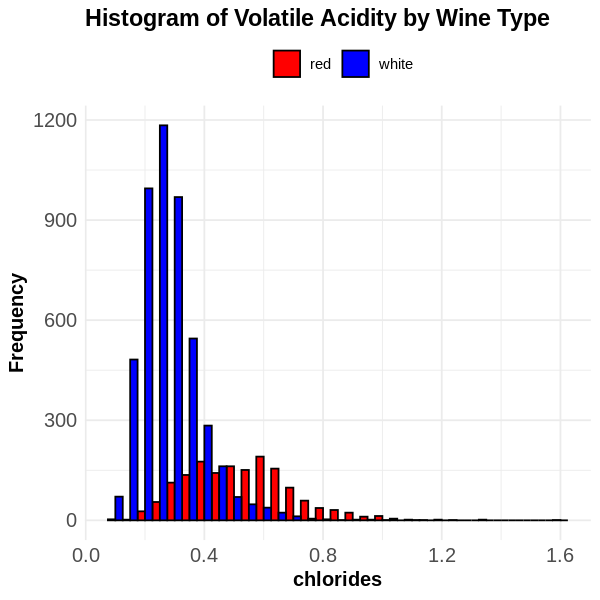

In [50]:
ggplot(wine_data, aes(x = volatile.acidity, fill = type)) +
  geom_histogram(binwidth = 0.05, position = "dodge", color = "black") +
  labs(title = paste("Histogram of Volatile Acidity by Wine Type"), x = feature, y = "Frequency") +
  scale_fill_manual(values = c("red" = "red", "white" = "blue")) +
  theme_minimal() +
  theme(legend.title = element_blank(),
        legend.position = "top",  # Change the legend position
        plot.title = element_text(size = 14, face = "bold"),  # Title style
        axis.text = element_text(size = 12),  # Axis label text size
        axis.title = element_text(size = 12, face = "bold"))

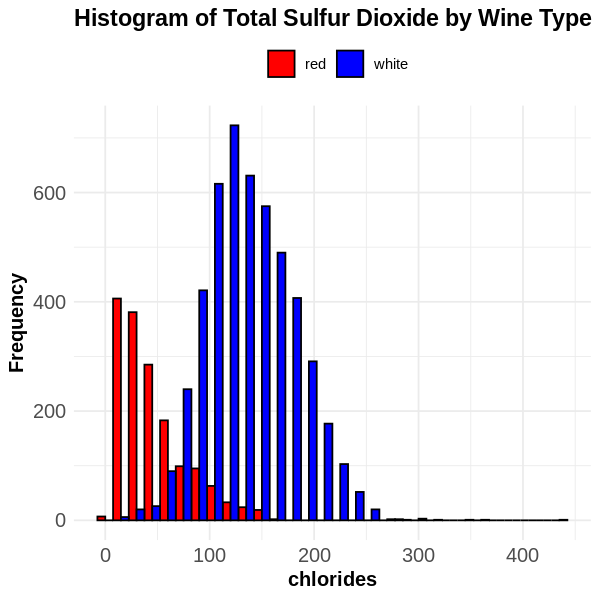

In [51]:
ggplot(wine_data, aes(x = total.sulfur.dioxide, fill = type)) +
  geom_histogram(binwidth = 15, position = "dodge", color = "black") +
  labs(title = paste("Histogram of Total Sulfur Dioxide by Wine Type"), x = feature, y = "Frequency") +
  scale_fill_manual(values = c("red" = "red", "white" = "blue")) +
  theme_minimal() +
  theme(legend.title = element_blank(),
        legend.position = "top",  # Change the legend position
        plot.title = element_text(size = 14, face = "bold"),  # Title style
        axis.text = element_text(size = 12),  # Axis label text size
        axis.title = element_text(size = 12, face = "bold"))

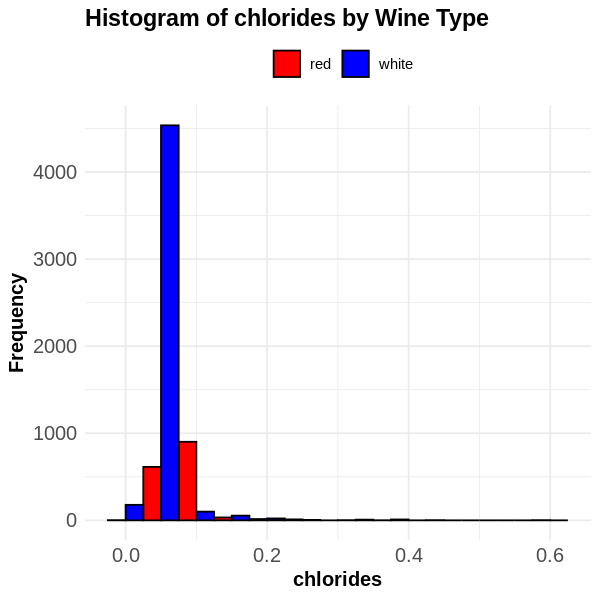

In [56]:
ggplot(wine_data, aes(x = chlorides, fill = type)) +
  geom_histogram(binwidth = 0.05, position = "dodge", color = "black") +
  labs(title = paste("Histogram of chlorides by Wine Type"), x = feature, y = "Frequency") +
  scale_fill_manual(values = c("red" = "red", "white" = "blue")) +
  theme_minimal() +
  theme(legend.title = element_blank(),
        legend.position = "top",  # Change the legend position
        plot.title = element_text(size = 14, face = "bold"),  # Title style
        axis.text = element_text(size = 12),  # Axis label text size
        axis.title = element_text(size = 12, face = "bold"))

In [66]:
wine_red <- wine_data_specific |>
                filter(type == "red") 
red_sd_volatile <- sd(wine_red$volatile.acidity)
red_sd_sulfur <- sd(wine_red$total.sulfur.dioxide)
red_sd_chloride <- sd(wine_red$chlorides)
cat("Standard Deviation of Volatile Acidity in Red Wine:", red_sd_volatile, "\n")
cat("Standard Deviation of Total Sulfur Dioxide in Red Wine:", red_sd_sulfur, "\n")
cat("Standard Deviation of Chlorides in Red Wine:", red_sd_chloride, "\n")
summary(wine_red)

Standard Deviation of Volatile Acidity in Red Wine: 0.1790597 
Standard Deviation of Total Sulfur Dioxide in Red Wine: 32.89532 
Standard Deviation of Chlorides in Red Wine: 0.0470653 


     type           volatile.acidity total.sulfur.dioxide   chlorides      
 Length:1599        Min.   :0.1200   Min.   :  6.00       Min.   :0.01200  
 Class :character   1st Qu.:0.3900   1st Qu.: 22.00       1st Qu.:0.07000  
 Mode  :character   Median :0.5200   Median : 38.00       Median :0.07900  
                    Mean   :0.5278   Mean   : 46.47       Mean   :0.08747  
                    3rd Qu.:0.6400   3rd Qu.: 62.00       3rd Qu.:0.09000  
                    Max.   :1.5800   Max.   :289.00       Max.   :0.61100  

In [67]:
wine_white <- wine_data_specific |>
                filter(type == "white")
white_sd_volatile <- sd(wine_white$volatile.acidity)
white_sd_sulfur <- sd(wine_white$total.sulfur.dioxide)
white_sd_chloride <- sd(wine_white$chlorides)
cat("Standard Deviation of Volatile Acidity in Red Wine:", white_sd_volatile, "\n")
cat("Standard Deviation of Total Sulfur Dioxide in Red Wine:", white_sd_sulfur, "\n")
cat("Standard Deviation of Chlorides in Red Wine:", white_sd_chloride, "\n")
summary(wine_white)

Standard Deviation of Volatile Acidity in Red Wine: 0.1007945 
Standard Deviation of Total Sulfur Dioxide in Red Wine: 42.49806 
Standard Deviation of Chlorides in Red Wine: 0.02184797 


     type           volatile.acidity total.sulfur.dioxide   chlorides      
 Length:4898        Min.   :0.0800   Min.   :  9.0        Min.   :0.00900  
 Class :character   1st Qu.:0.2100   1st Qu.:108.0        1st Qu.:0.03600  
 Mode  :character   Median :0.2600   Median :134.0        Median :0.04300  
                    Mean   :0.2782   Mean   :138.4        Mean   :0.04577  
                    3rd Qu.:0.3200   3rd Qu.:167.0        3rd Qu.:0.05000  
                    Max.   :1.1000   Max.   :440.0        Max.   :0.34600  